In [4]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [5]:
def img_combine(img, ncols=8, size=1, path=False):
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len(img)
    nrows = int(ceil(nimg/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip(np.arange(nrows), axes):
            nth=r
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                
            ax.set_axis_off()
    elif nrows == 1:
        for c, ax in zip(np.arange(ncols), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(ncols), row):
                nth=r*ncols+c
                if nth < nimg:
                    ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                ax.set_axis_off()
    plt.show()

In [6]:
# 讀取 Cifar-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

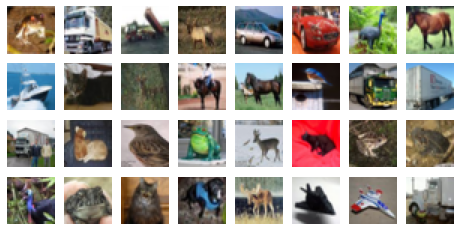

In [7]:
images = x_train[:32]
labels = y_train[:32]
img_combine(images)

In [8]:
# 建立 ImageDataGenerator，並指定我們要做資料增強的數值範圍
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

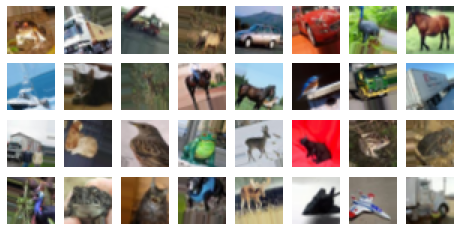

In [9]:
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

In [11]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam
import os

In [12]:
batch_size = 10 
num_classes = 10 
epochs = 10

In [13]:
images = images.astype('float32')
x_test = x_test.astype('float32')
images /= 255
x_test /= 255

# Convert class vectors to binary class matrices.
labels = keras.utils.to_categorical(labels, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

In [15]:
def my_generator(x, y):
    while True:
        batch_x, batch_y = next(data_generator.flow(images, shuffle=False)), y
        yield batch_x, batch_y
            
train_generator = my_generator(images, labels)


In [16]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=100, # 一個 epochs 要執行幾次 update，通常是資料量除以 batch size
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
100/100 [==============================] - 28s 284ms/step - loss: 1.4277 - accuracy: 0.4928 - val_loss: 4.9001 - val_accuracy: 0.2024
Epoch 2/10
100/100 [==============================] - 28s 277ms/step - loss: 0.5494 - accuracy: 0.8144 - val_loss: 6.2677 - val_accuracy: 0.2022
Epoch 3/10
100/100 [==============================] - 28s 275ms/step - loss: 0.3066 - accuracy: 0.9147 - val_loss: 7.0470 - val_accuracy: 0.2095
Epoch 4/10
100/100 [==============================] - 27s 272ms/step - loss: 0.2246 - accuracy: 0.9388 - val_loss: 8.3911 - val_accuracy: 0.2056
Epoch 5/10
100/100 [==============================] - 28s 276ms/step - loss: 0.1504 - accuracy: 0.9544 - val_loss: 8.8456 - val_accuracy: 0.2100
Epoch 6/10
100/100 [==============================] - 27s 272ms/step - loss: 0.1135 - accuracy: 0.9653 - val_loss: 10.3516 - val_accuracy: 0.1969
Epoch 7/10
100/100 [==============================] - 27s 273ms/step - loss: 0.0796 - accuracy: 0.9753 - val_loss: 11.4687 - val_